# Task 3 CAR PRICE PREDICTION WITH MACHINE LEARNING

# Import All important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car=pd.read_csv("/Users/ayush.singh/Desktop/Obss/car data.csv")
car

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
car.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# checking the distribution of categorical data

In [7]:
print(car.Fuel_Type.value_counts())
print(car.Selling_type.value_counts())
print(car.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Selling_type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


# Data Preprocessing

Drop Car Name Column

That column has object data type.

In [8]:
car=car.drop("Car_Name",axis=1)

In [9]:
car

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
car.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# EDA
# checking the outliers

<Axes: >

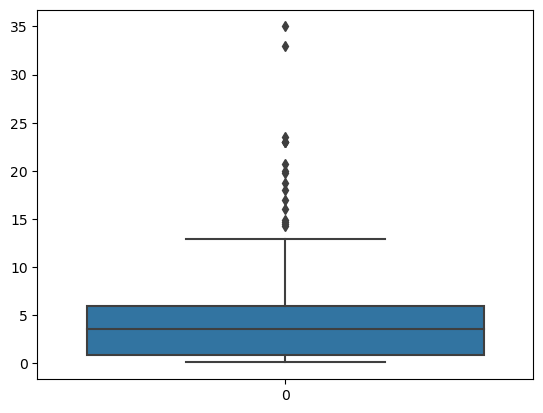

In [11]:
sns.boxplot(car['Selling_Price'])

/Users/ayush.singh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


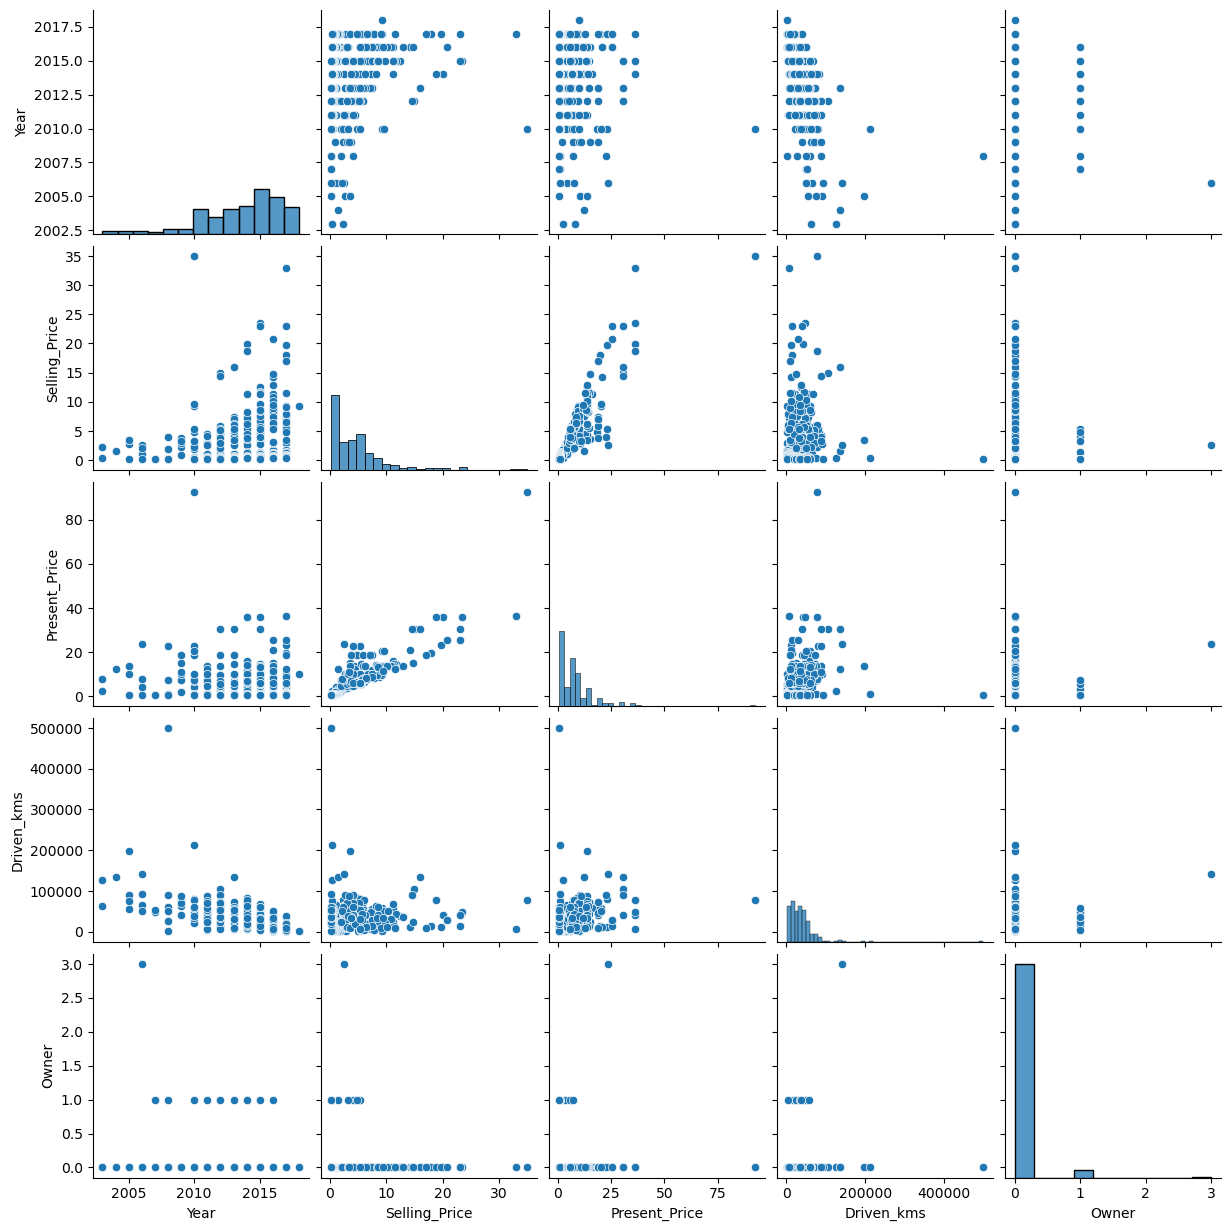

In [12]:
sns.pairplot(car)
plt.show()

/Users/ayush.singh/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


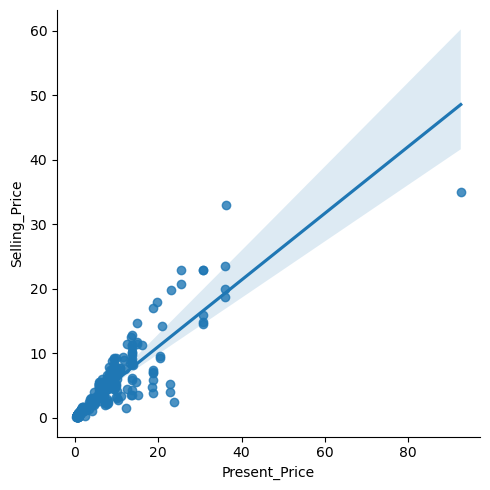

In [13]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=car)

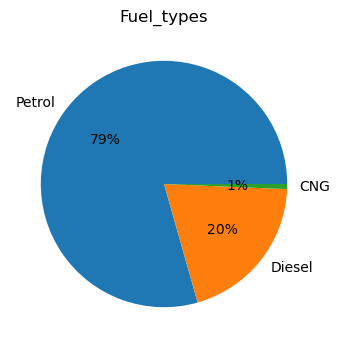

In [14]:
fuel_types = ['Petrol','Diesel','CNG']

fuel_data = pd.Series(car['Fuel_Type']).value_counts()

plt.figure(figsize=(4,4))

plt.pie(fuel_data,labels=fuel_types,autopct='%.0f%%')
plt.title("Fuel_types")

plt.show()

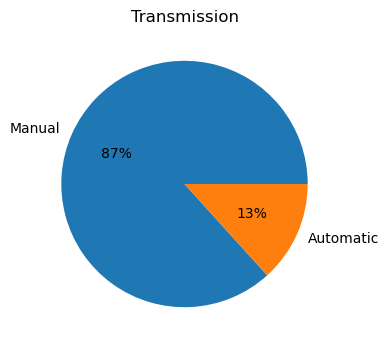

In [15]:
transmission = ['Manual','Automatic']

trans_data = pd.Series(car['Transmission']).value_counts()

plt.figure(figsize=(4,4))

plt.pie(trans_data,labels=transmission,autopct='%.0f%%')
plt.title("Transmission")

plt.show()

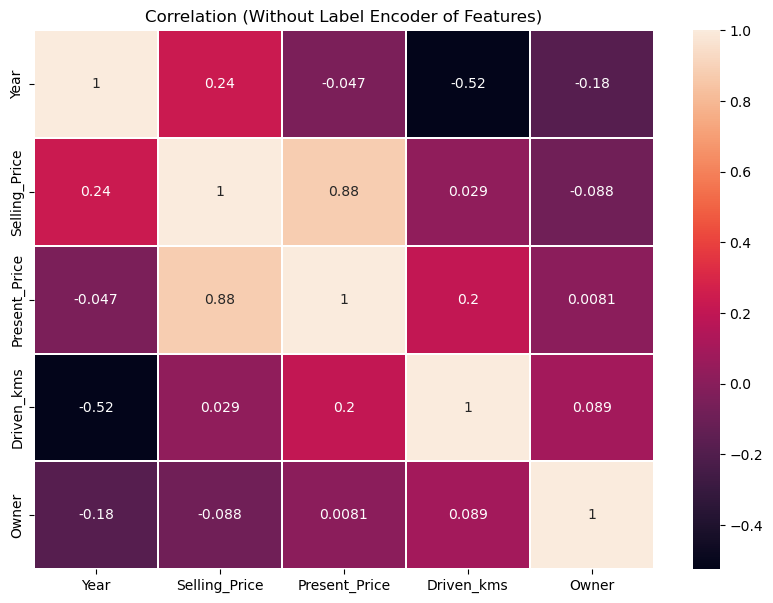

In [16]:
plt.figure(figsize=(10,7))
numeric_car = car.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_car.corr(), annot=True, linewidths=0.2, linecolor='white')
plt.title('Correlation (Without Label Encoder of Features)')
plt.show()

# Encoding the Categorical Data

In [17]:
# encoding "Fuel_Type" Column
car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace = True)

# encoding "Seller_Type" Column
car.replace({'Selling_type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
car.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [18]:
car.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,0,0,0,0
1,2013,4.75,9.54,43000,1,0,0,0
2,2017,7.25,9.85,6900,0,0,0,0
3,2011,2.85,4.15,5200,0,0,0,0
4,2014,4.60,6.87,42450,1,0,0,0


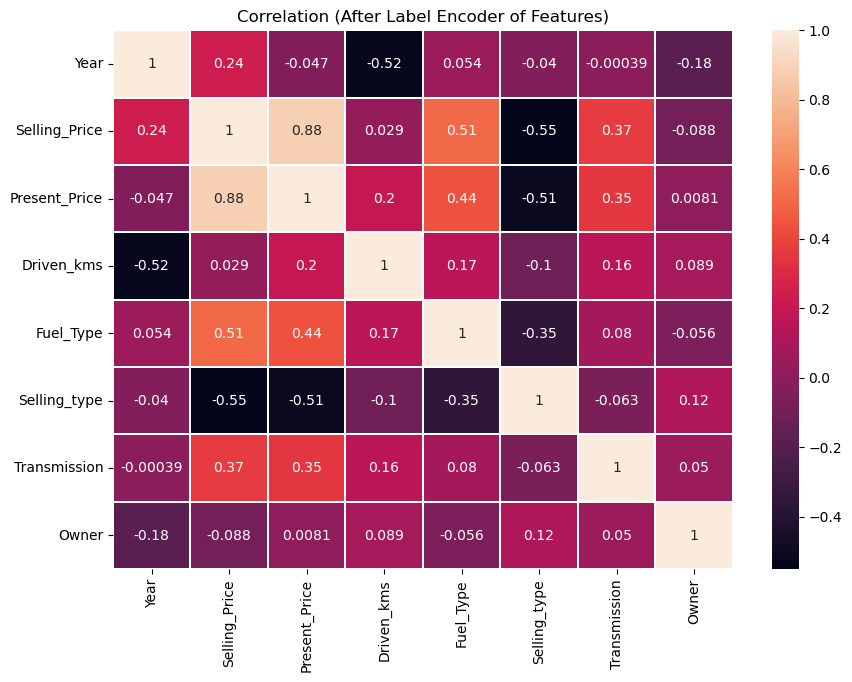

In [19]:
plt.figure(figsize=(10,7))
sns.heatmap(car.corr(),annot=True,linewidths=0.2,linecolor='white')
plt.title('Correlation (After Label Encoder of Features)')
plt.show()

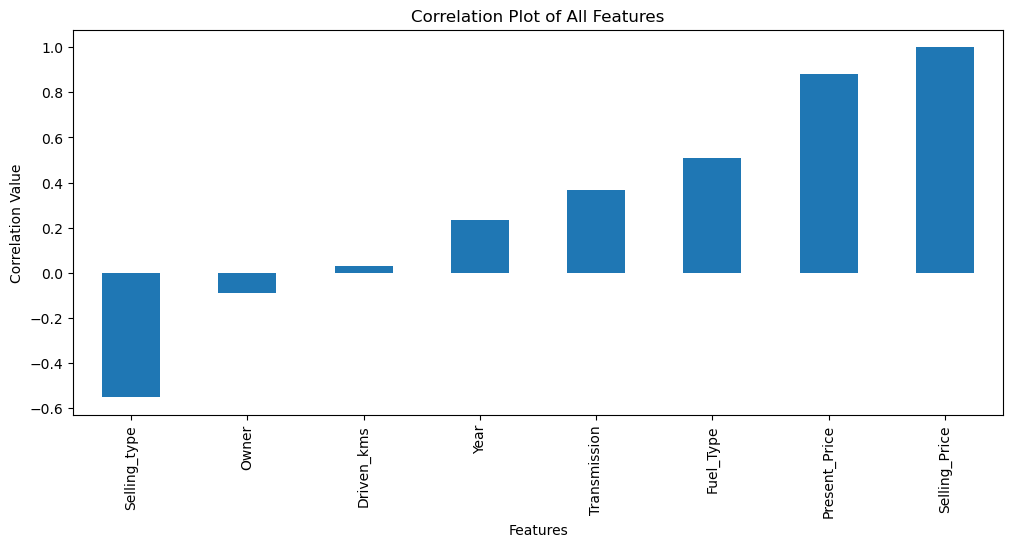

In [20]:
plt.figure(figsize=(12,5))

car.corr()['Selling_Price'].sort_values().plot(kind='bar')

plt.xlabel('Features')

plt.ylabel('Correlation Value')

plt.title('Correlation Plot of All Features')

plt.show()

In [21]:
X = car.drop(['Selling_Price'],axis=1)
Y = car['Selling_Price']

In [22]:
print("All data set :",car.shape)

All data set : (301, 8)


In [23]:
X

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [24]:
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Splitting Training and Test data

In [26]:
X_train,X_test,Y_train,Y_test =train_test_split(X,Y, test_size = 0.25, random_state=2)

In [27]:
X_train

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
155,2017,0.51,4300,0,1,1,0
104,2017,1.47,4100,0,1,0,0
285,2016,8.50,15059,0,0,1,0
219,2012,9.40,36000,0,0,0,0
291,2015,6.10,31427,0,0,0,0
...,...,...,...,...,...,...,...
75,2015,6.80,36000,0,0,0,0
22,2011,8.01,50000,0,0,1,0
72,2013,18.61,56001,0,0,0,0
15,2016,10.79,43000,1,0,0,0


In [28]:
Y_train

155    0.48
104    1.35
285    7.40
219    4.50
291    5.40
       ... 
75     3.95
22     4.40
72     7.45
15     7.75
168    0.42
Name: Selling_Price, Length: 225, dtype: float64

In [29]:
X_train.shape,X_test.shape

((225, 7), (76, 7))

In [30]:
## Feature Selection based on correlaltion
X_train.corr()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
Year,1.000000,-0.036606,-0.508518,0.091940,-0.024414,0.027781,-0.182518
Present_Price,-0.036606,1.000000,0.155756,0.470459,-0.495570,0.327254,0.021186
Driven_kms,-0.508518,0.155756,1.000000,0.118227,-0.077266,0.143798,0.100329
Fuel_Type,0.091940,0.470459,0.118227,1.000000,-0.337263,0.142431,-0.047978
Selling_type,-0.024414,-0.495570,-0.077266,-0.337263,1.000000,-0.064748,0.120420
Transmission,0.027781,0.327254,0.143798,0.142431,-0.064748,1.000000,0.067533
Owner,-0.182518,0.021186,0.100329,-0.047978,0.120420,0.067533,1.000000


# Model Training
Linear Regression

In [31]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

# Model Evaluation

In [32]:
# prediction on Testing data
linear_prediction = model.predict(X_test)
print("Test Data")
# R squared Error
error_score = metrics.r2_score(Y_test, linear_prediction)
mse_score = metrics.mean_squared_error(Y_test,linear_prediction)
print("R squared Error of Test Data : ", error_score)
print("mse :" , mse_score)

Test Data
R squared Error of Test Data :  0.8340671431715845
mse : 2.7138703086034495


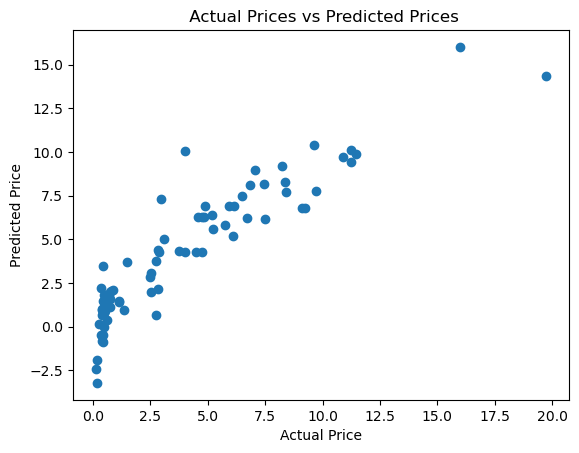

In [33]:
plt.scatter(Y_test, linear_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()


# Lasso Regression

In [34]:
# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,Y_train)

Lasso()

In [35]:
# prediction on testing data
lasso_prediction = lass_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(Y_test, lasso_prediction)
mse_score = metrics.mean_squared_error(Y_test,lasso_prediction)
print("R squared Error : ", error_score)
print("mse :" , mse_score)

R squared Error :  0.8488371767957701
mse : 2.4723029874839146


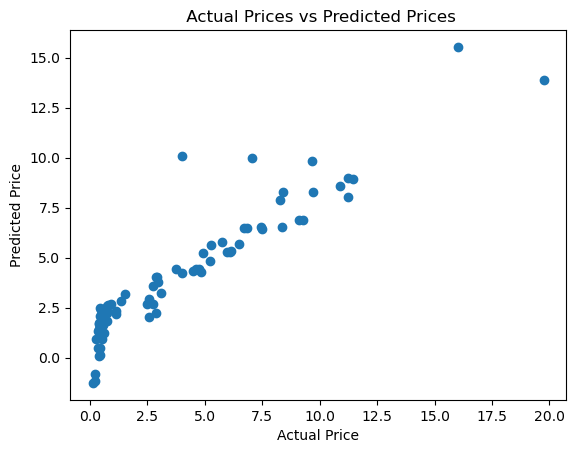

In [36]:
plt.scatter(Y_test, lasso_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

# Ridge Regression

In [37]:
from sklearn.linear_model import Ridge
model_rid=Ridge()
model_rid.fit(X_train,Y_train)

Ridge()

R squared Error :  0.8367067599175322
mse : 2.4723029874839146


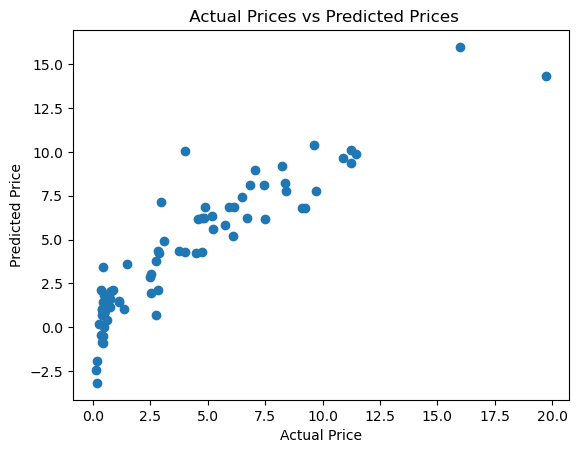

In [38]:
# prediction on testing data
ridge_prediction = model_rid.predict(X_test)
# R squared Error
error_score =metrics.r2_score(Y_test,ridge_prediction)
mse = metrics.mean_squared_error(Y_test,ridge_prediction)
print("R squared Error : ", error_score)
print("mse :" , mse_score)
plt.scatter(Y_test, ridge_prediction )
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [39]:
differ = pd.DataFrame({'Actual Price':Y_test,'Prediction Price':lasso_prediction,'Difference':(Y_test - lasso_prediction)})
differ

,Actual Price,Prediction Price,Difference
99,9.65,9.847869,-0.197869
161,0.45,1.463219,-1.013219
89,4.75,4.368131,0.381869
30,3.10,3.211581,-0.111581
232,11.45,8.937002,2.512998
...,...,...,...
294,3.75,4.428798,-0.678798
209,4.85,4.288698,0.561302
147,0.55,1.615413,-1.065413
54,2.75,2.694831,0.055169


In [40]:
lass_reg_model.predict([[2016,5.79,8000,2,0,1,0]])

/Users/ayush.singh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([4.7580156])